<a href="https://colab.research.google.com/github/Akanerd/Computer-Vision---Orbit/blob/main/ComputerVision%20-%20Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from google.colab.patches import cv2_imshow
%matplotlib inline

In [2]:
cv.__version__ # cek OpenCv

'4.1.2'

# **Manipulasi Citra**

**Menampilkan Gambar dengan Matplotlib dan OpenCV**

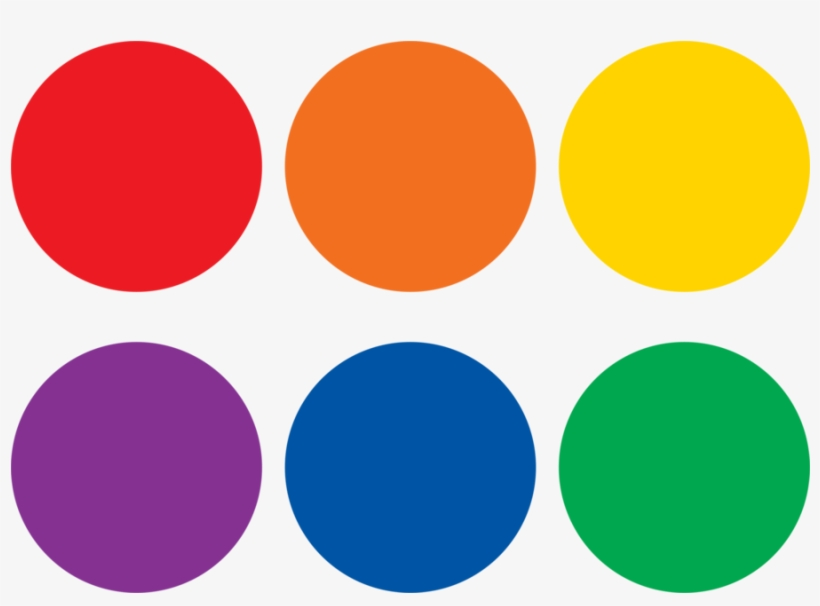

<function matplotlib.pyplot.show>

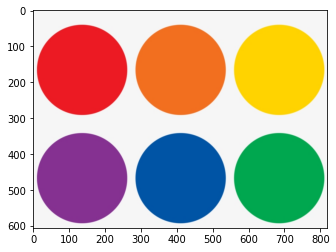

In [12]:
circle = cv.imread('circles.png')
cv2_imshow(circle) # selama menggunakan OpenCV tidak usah dikonversikan ke BGR
img = cv.cvtColor(circle,cv.COLOR_BGR2RGB) 
plt.imshow(img) # menggunakan matplotlib, bisa saja menggunakan openCV akan tetapi akan bertabrakan dengan matplotlib 
plt.show           # sehingga diperlukan tab baru jika menggunakan keduanya
                   # Perbedaan ketika menggunakan OpenCV menggunakan format channel warna BGR sedangkan matplotlib menggunakan channel warna RGB sehingga terdapat perbedaan warna  

In [13]:
type(circle)

numpy.ndarray

In [14]:
circle.shape
# baris , tinggi , 3 Channel Warna
#(606   ,  820   , 3)

(606, 820, 3)

In [15]:
h,w,c = circle.shape
h,w,c

(606, 820, 3)

**Menampilkan data pixel beserta Tipe data Citra**

In [24]:
circle[:,:,0]

array([[248, 247, 247, ..., 247, 247, 247],
       [247, 246, 246, ..., 246, 246, 247],
       [247, 246, 246, ..., 246, 246, 247],
       ...,
       [247, 246, 246, ..., 246, 246, 247],
       [247, 246, 246, ..., 246, 246, 247],
       [248, 247, 247, ..., 246, 246, 247]], dtype=uint8)

**Akses Citra PerChannel**

In [16]:
circle[:,:,0].shape

(606, 820)

In [17]:
circle[:,:,1].shape

(606, 820)

In [18]:
circle[:,:,2].shape

(606, 820)

**Akses Citra berdasarkan Komponen warna**

In [ ]:
# Berdasarkan Case untuk mengambil salah satu warna saja 
# seperti mengambil 1 intensitas warna pada klorofil Daun
B,G,R = cv.split(circle)
print("Blue Channel")
cv2_imshow(B)
print("Green Channel")
cv2_imshow(B)
print("Red Channel")
cv2_imshow(B)

**Akses Citra Gray Channel**

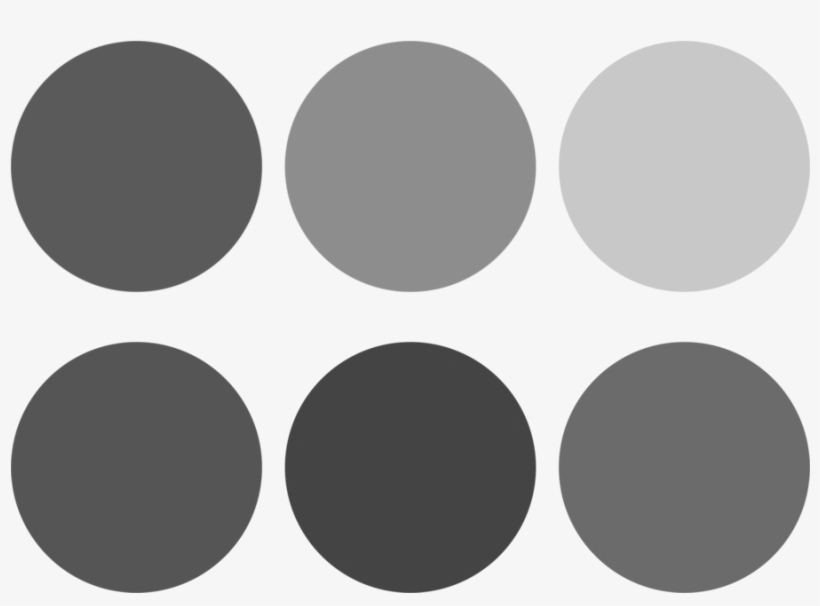

In [23]:
# Berdasarkan case untuk membuat Dataset, pengenalan angka pada sebuah dataset
image_gray = cv.cvtColor(circle,cv.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

**Image Cropping**

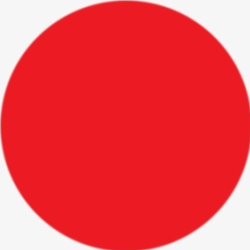

In [37]:
# Ketika melakukan data learning agar lebih cepat maka dilakukan Cropping pada citra
patch = (250,250) # Ukuran yang ingin dipotong
center = (135,165) # titik tengah yang ingin dipotong, titik koordinatdari gambar lama
crop_image = cv.getRectSubPix(circle, patch, center)
cv2_imshow(crop_image)

**Image Rotation**

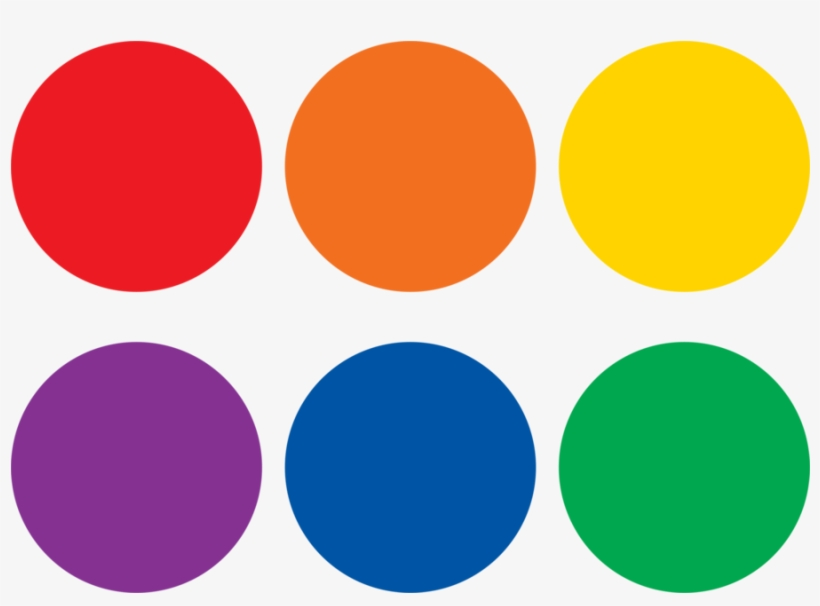

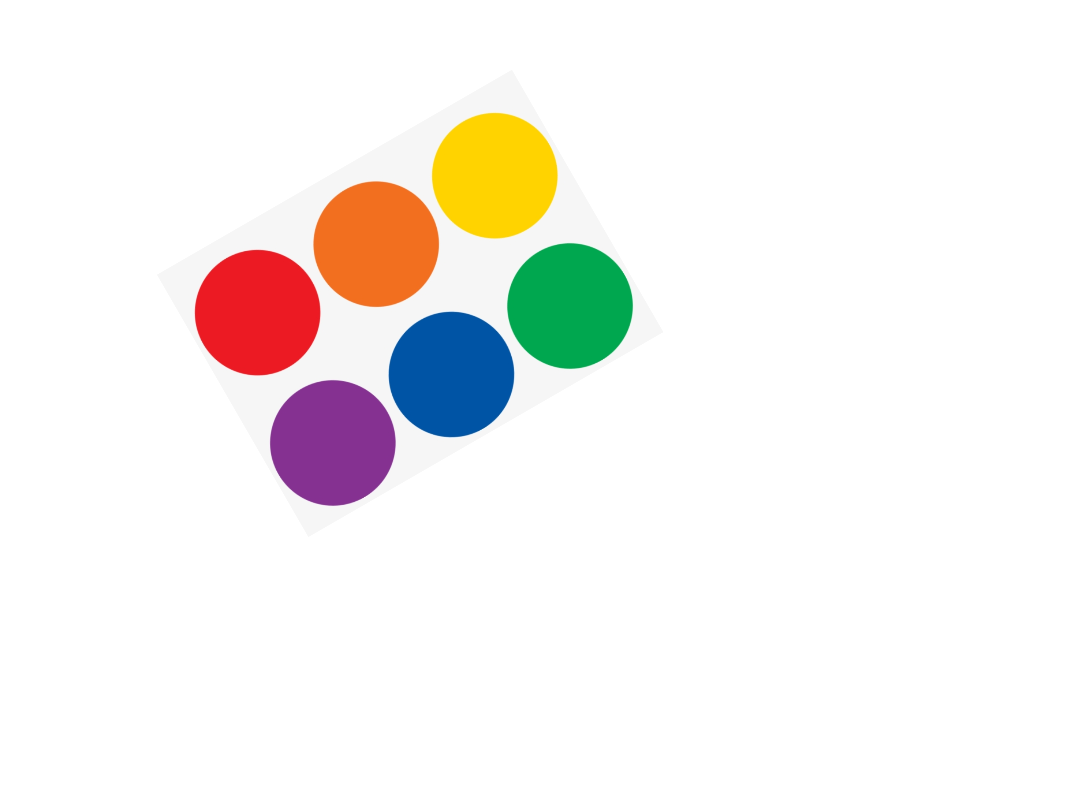

In [33]:
center = circle.shape[1]/2, circle.shape[0]/2
angle = 30
scale = 0.5
M = cv.getRotationMatrix2D(center, angle, scale)
                                  # karen gambar 2 dimensi menggunakan dua shape
rotate = cv.warpAffine(circle, M, (int(circle.shape[1]*1.3), int(circle.shape[0]*1.3)), borderValue=(255,255,255))
cv2_imshow(circle)
cv2_imshow(rotate)

**Image Translation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


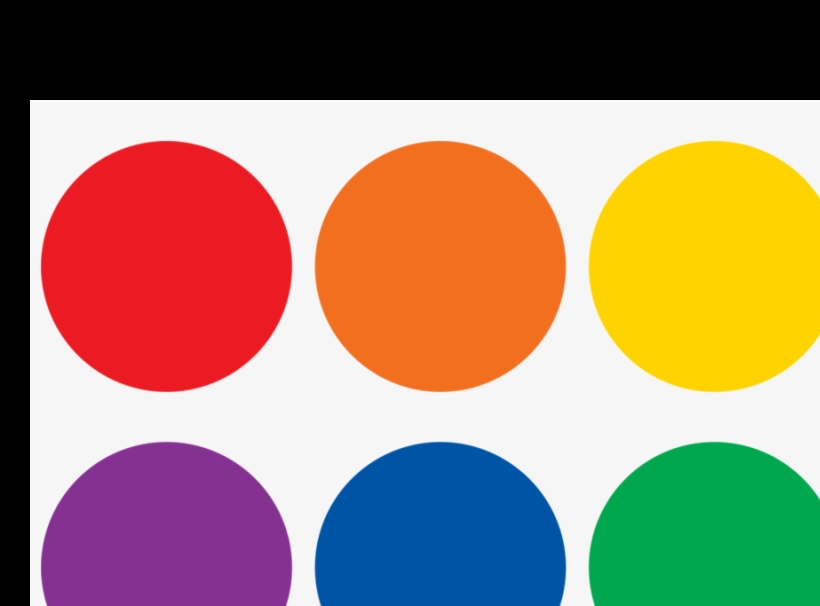

In [38]:
shift = cv.warpAffine(circle, 
                      np.array([[1,0,30],
                                [0,1,100]],
                                dtype = np.float), dsize=(circle.shape[1],circle.shape[0]))
cv2_imshow(shift)

**Image Resize**

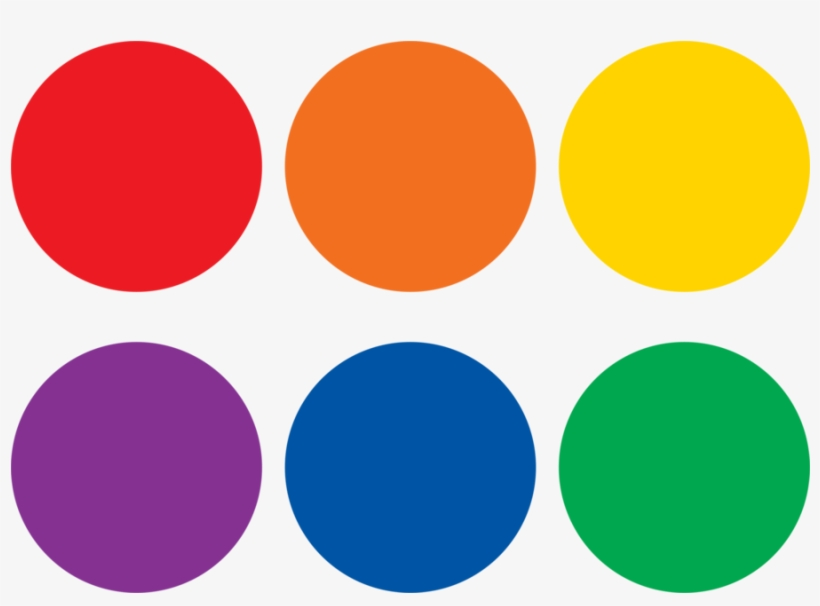

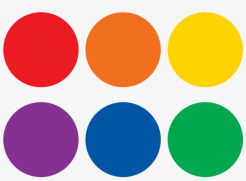

In [43]:
width,height = int(circle.shape[1]*0.3), int(circle.shape[0]*0.3)
resize = cv.resize(circle, (width,height),interpolation = cv.INTER_AREA,)
cv2_imshow(circle)
cv2_imshow(resize)

**Image Flipping**

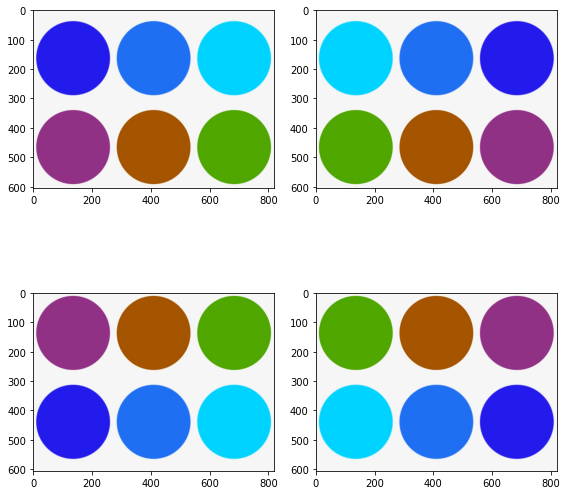

In [52]:
fig, axes = plt.subplots(2,2, figsize = (8,8))
fig.tight_layout()
axes = axes.ravel()
axes[0].imshow(circle)
axes[1].imshow(circle[:,::-1, :]) #Flip Ke kiri
axes[2].imshow(circle[::-1,:, :]) # Flip ke bawah
axes[3].imshow(circle[::-1,::-1, :]) # Flip ke bawah dan ke kiri

**Image Padding**

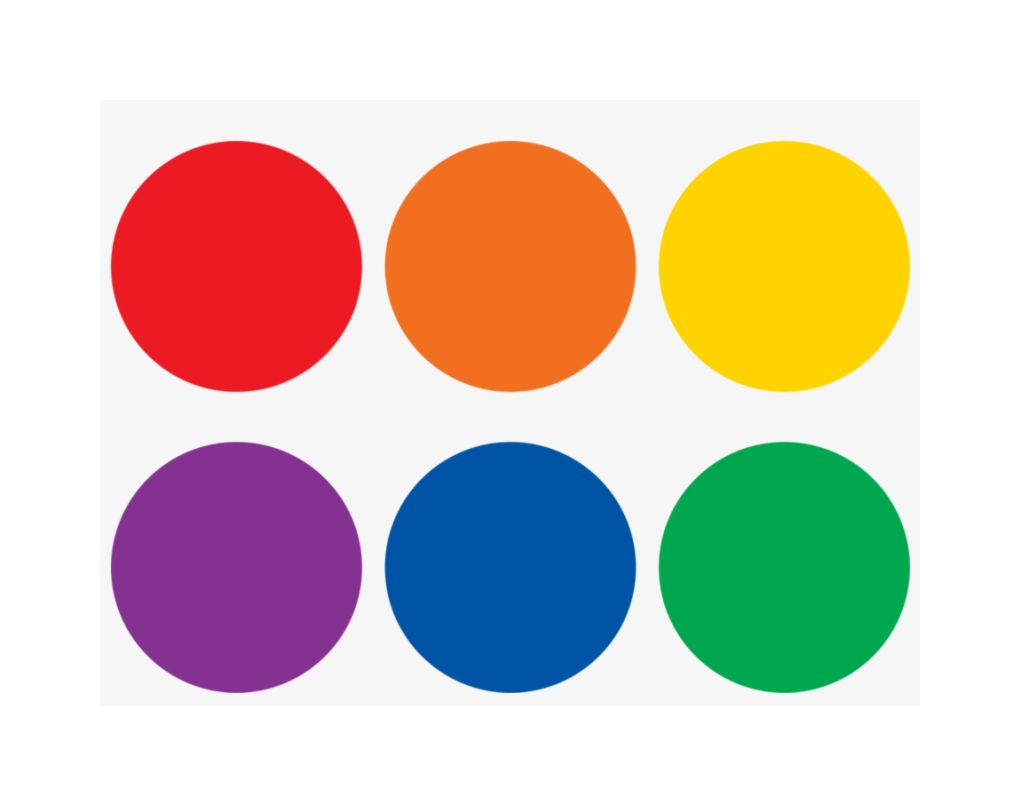

In [54]:
bordersize = 100
color = [255,255,255]
border=cv.copyMakeBorder(circle, 
                         top=bordersize, bottom = bordersize,
                         left=bordersize, right = bordersize,
                         borderType = cv.BORDER_CONSTANT,
                         value= color)
cv2_imshow(border)

# **Perbaikan Citra**

**Log Transformation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


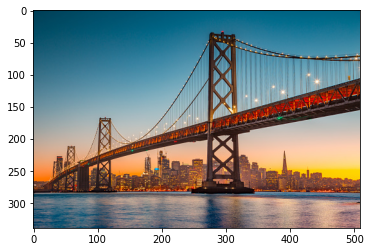

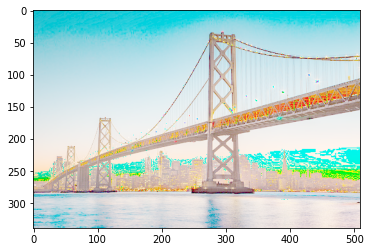

In [56]:
SF = cv.imread('SanFrancisco.jpg')
SF = cv.cvtColor(SF,cv.COLOR_BGR2RGB)
# Mangaplikasikan log Transform pada citra
c = 255/np.log(1+np.max(SF))
log_SF = c*(np.log(SF+1))
# Mengkonversikan float ke int
log_SF = np.array(log_SF,dtype = np.uint8)
plt.imshow(SF)
plt.show()
plt.imshow(log_SF)
plt.show()


**Law Gamma Transformation**

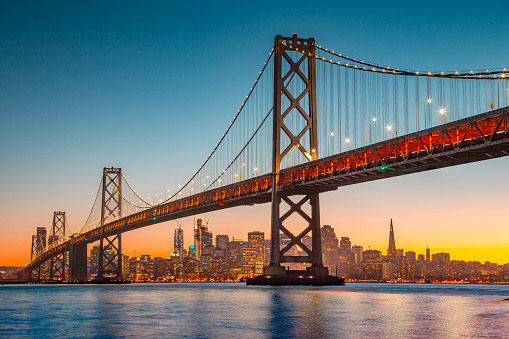

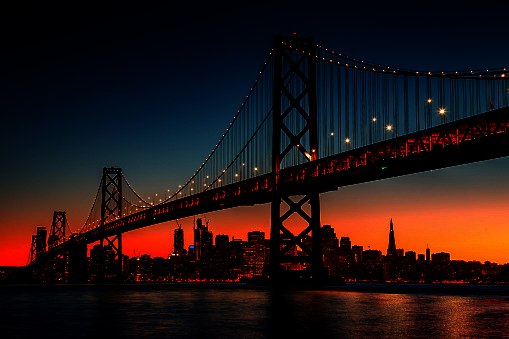

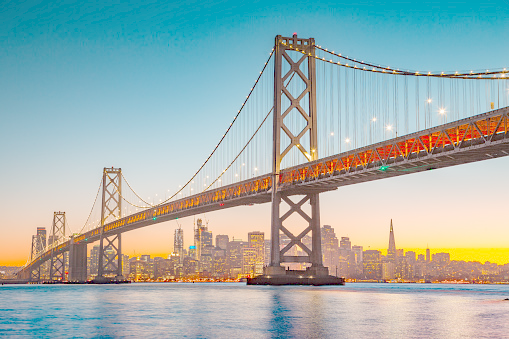

In [62]:
def GammaCorrection(src, gamma):
  invGamma = 1/gamma
  #membuat lookup Table
  table = [((i/255)**invGamma)*255 for i in range(256)]
  table = np.array(table, np.uint8)
  return cv.LUT(src,table)
SF = cv.imread('SanFrancisco.jpg')
smallgamma_SF = GammaCorrection(SF,0.2)
biggamma_SF = GammaCorrection(SF,2.2)
cv2_imshow(SF)
cv2_imshow(smallgamma_SF)
cv2_imshow(biggamma_SF)

**Histogram Equalization**

In [67]:
#Read Image
HaB = cv.imread('Unequalized_Hawkes_Bay_NZ.jpg')
HaB = cv.cvtColor(HaB, cv.COLOR_BGR2GRAY)

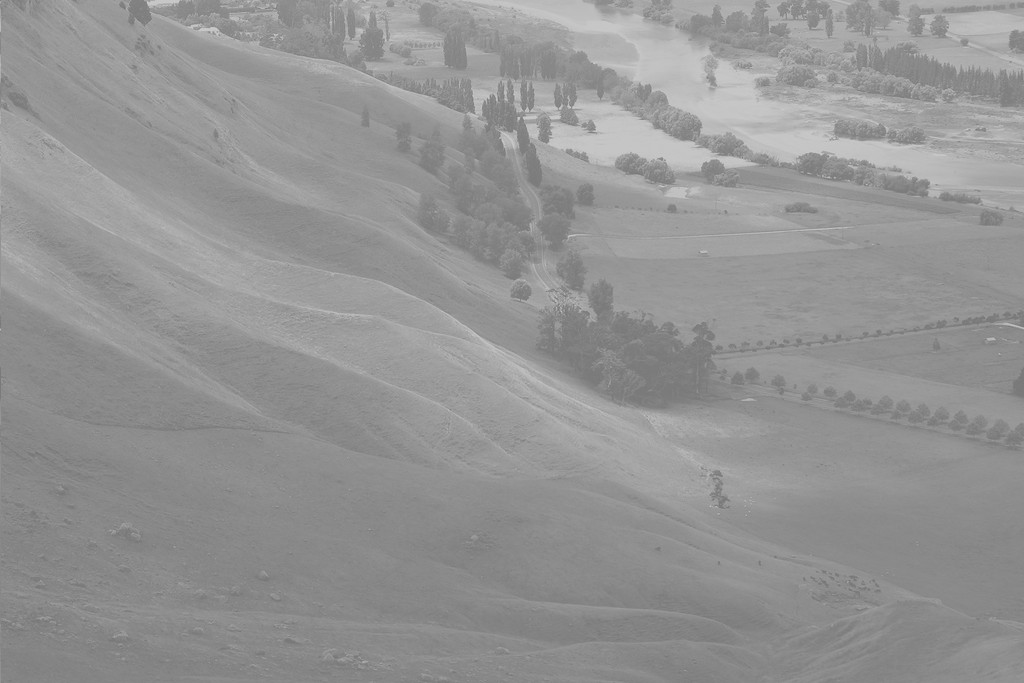

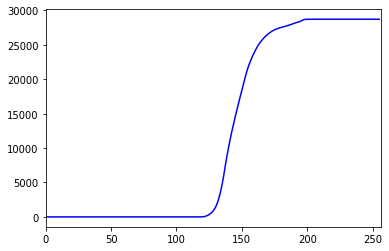

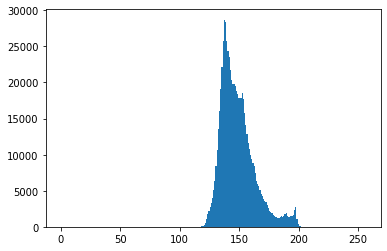

In [69]:
hist,bins = np.histogram(HaB,256,[0,256])

cf=hist.cumsum()
cf_normalized = cf*hist.max()/cf.max()

plt.plot(cf_normalized,color = 'b')
plt.xlim([0,256])
cv2_imshow(HaB)
plt.show()
plt.hist(HaB.ravel(),bins = 256, range = [0,256])
plt.show()

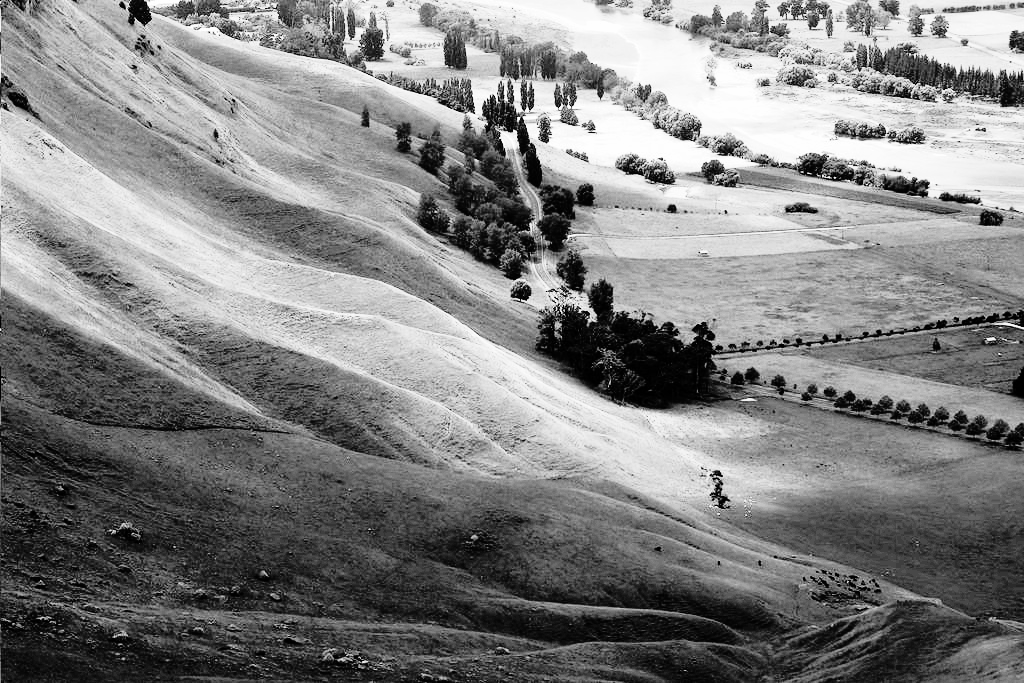

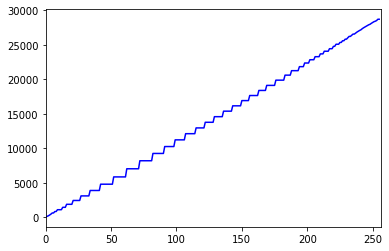

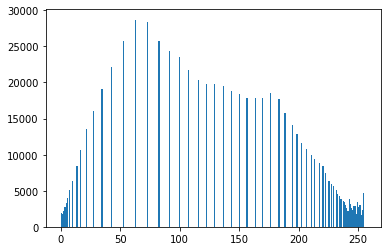

In [70]:
# Normalisasi Citra
cf_m = np.ma.masked_equal(cf,0)
cf_m = (cf_m - cf_m.min())*255/(cf_m.max()-cf_m.min())
cf = np.ma.filled(cf_m,0).astype('uint8')

equ = cf[HaB]

hist,bin = np.histogram(equ,256,[0,256])
cf_eq = hist.cumsum()
cf_eq_normalized = cf_eq*float(hist.max())/cf_eq.max()

plt.plot(cf_eq_normalized,color = 'b')
plt.xlim([0,256])
cv2_imshow(equ)
plt.show()
plt.hist(equ.ravel(),bins=256, range = [0,256])
plt.show()

**Image Filtering**

In [ ]:
SF= cv.imread('San Francisco')

**Low Pass Filter/Blurring/Gaussian Blur**

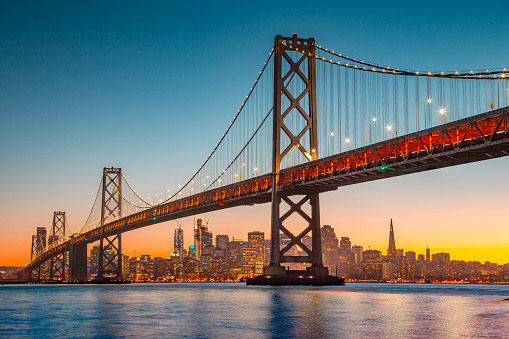

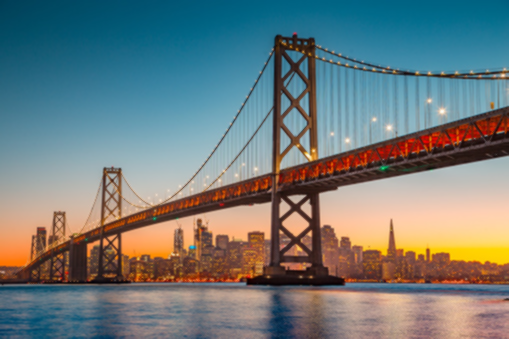

In [72]:
buff = SF.copy()

kernel = np.array([[1,1,1],
                   [1,4,1],
                   [1,1,1]])/12

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)

High Pass/Edge/Detection/Sobel

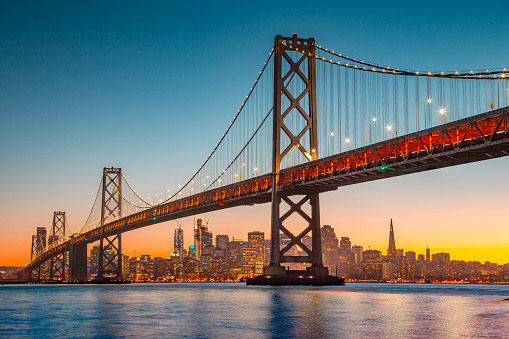

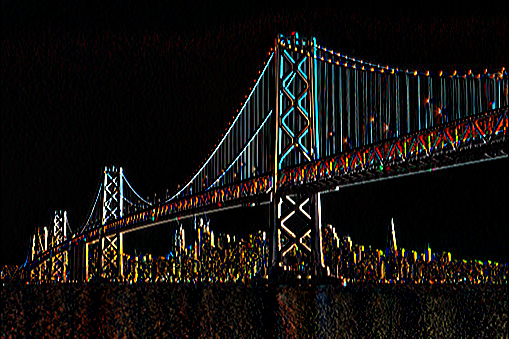

In [74]:
buff = SF.copy()

kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)

**band Stop Filter**

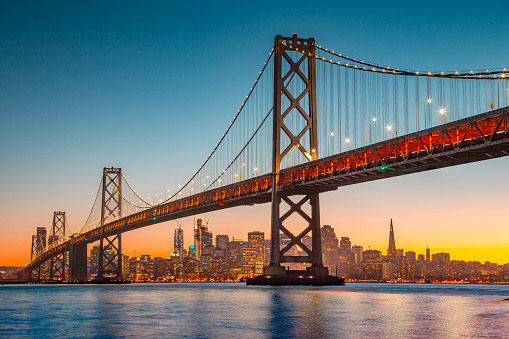

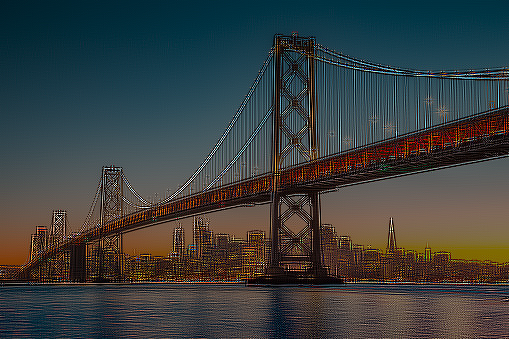

In [75]:
buff = SF.copy()

kernel = np.array([[1,-1,1],
                   [-1,0.5,-1],
                   [1,-1,1]])

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)